In [1]:
import json
import time
import dxcam
import socket
import pickle
import datetime
import win32gui
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from skimage import data, io
import skimage.transform as st
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from pynput.keyboard import Key, Controller

In [5]:
hwnd = win32gui.FindWindow(None, "Grand Theft Auto V")
window = win32gui.GetWindowRect(hwnd)
window = (window[0] + 8, window[1] + 31, window[2] - 8, window[3] - 8)
camera = dxcam.create(output_color="RGB")
height, width = 128, 227

def get_screenshot():
    frame = camera.grab(region=(window))
    while frame is None:
        frame = camera.grab(region=(window))
    frame = st.resize(frame, (height, width))
    return frame

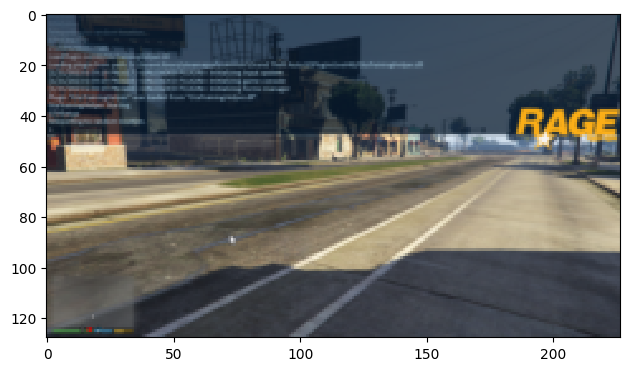

In [6]:
frame = get_screenshot()
io.imshow(frame)
plt.show()



In [7]:
keyboard = Controller()

In [ ]:
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.bind(("127.0.0.1", 5001))
s.listen()
clientsocketpython, address = s.accept()

In [9]:
def do_action(action):
    if (action == 0):
        keyboard.press('z')
        time.sleep(0.2)
        keyboard.release('z')
    elif (action == 1):
        keyboard.press('s')
        time.sleep(0.2)
        keyboard.release('s')
    elif (action == 2):
        keyboard.press('q')
        time.sleep(0.2)
        keyboard.release('q')
    elif (action == 3):
        keyboard.press('d')
        time.sleep(0.2)
        keyboard.release('d')
    elif (action == 4):
        keyboard.press(Key.space)
        time.sleep(0.2)
        keyboard.release(Key.space)

In [ ]:
while True:
    data = clientsocketpython.recv(1024)
    data = data.decode("utf-8")
    if data == "true":
        frame = get_screenshot()
        frame = pickle.dumps(frame)
        clientsocketpython.send(frame)
    else:
        do_action(int(data))